In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
df=pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [3]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5169, 2)


In [7]:
print(df.isnull().sum())

label      0
message    0
dtype: int64


In [8]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['message'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [10]:
# from sklearn.feature_extraction.text import CountVectorizer
# message = CountVectorizer(analyzer=process).fit_transform(df['message'])
# message

In [12]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer=process)
message= tfidf_vectorizer.fit_transform(df['message'])

In [15]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['label'], test_size=0.20, random_state=0)
# To see the shape of the data
print(message.shape)

(5169, 11425)


In [16]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
naive = MultinomialNB()
classifier=naive.fit(xtrain, ytrain)
params_naive = {'alpha': [0.01, 0.1, 1.0, 10.0]}
naive_gs = GridSearchCV(naive, params_naive, cv=5)
ng=naive_gs.fit(xtrain, ytrain)

In [18]:
print(classifier.predict(xtrain))
print(ytrain.values)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']


In [19]:
#save best model
naive_best = naive_gs.best_estimator_
#check best n_neigbors value
print(naive_gs.best_params_)

{'alpha': 0.1}


In [20]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
k=knn_gs.fit(xtrain, ytrain)

In [21]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 23}


In [22]:
print(k.predict(xtrain))
print(ytrain.values)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']


In [23]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
r=rf_gs.fit(xtrain, ytrain)

In [24]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [25]:
print(r.predict(xtrain))
print(ytrain.values)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'spam']


In [26]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(xtest, ytest)))
print('rf: {}'.format(rf_best.score(xtest, ytest)))
print('c: {}'.format(naive_best.score(xtest, ytest)))

knn: 0.9226305609284333
rf: 0.9729206963249516
c: 0.9622823984526112


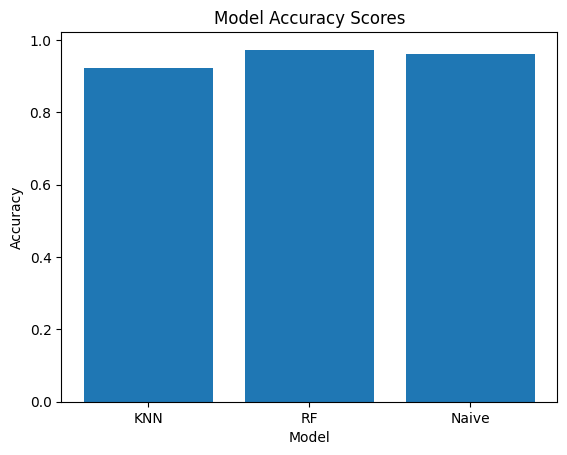

In [27]:
import matplotlib.pyplot as plt
# Define the data to plot
models = ['KNN', 'RF', 'Naive']
scores = [knn_best.score(xtest, ytest), rf_best.score(xtest, ytest), naive_best.score(xtest, ytest)]
# Create a bar plot
plt.bar(models, scores)
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


In [28]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('c', naive_best)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [29]:
#fit model to training data
ensemble.fit(xtrain, ytrain)
#test our model on the test data
ensemble.score(xtest, ytest)

0.9729206963249516

**Accuracy of training data**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
# , precision_recall_fscore_support

# Predict the class labels for the test data
y_pred = ensemble.predict(xtrain)

# Compute the confusion matrix
cm = confusion_matrix(ytrain, y_pred)
print("Confusion matrix:")
print(cm)

# Compute the classification report
report = classification_report(ytrain, y_pred)
print("Classification report:")
print(report)

# Compute the precision, recall, F1-score, and support for each class
# precision, recall, f1, support = precision_recall_fscore_support(ytrain, y_pred)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
# print("Support:", support)
accuracy = ensemble.score(xtrain, ytrain)
print("Accuracy on train data:", accuracy)

Confusion matrix:
[[3620    0]
 [   8  507]]
Classification report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3620
        spam       1.00      0.98      0.99       515

    accuracy                           1.00      4135
   macro avg       1.00      0.99      1.00      4135
weighted avg       1.00      1.00      1.00      4135

Accuracy on train data: 0.9980652962515115


**Accuracy of testing data**

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the class labels for the test data
y_pred = ensemble.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion matrix:")
print(cm)

# Compute the classification report
report = classification_report(ytest, y_pred)
print("Classification report:")
print(report)

# Compute the precision, recall, F1-score, and support for each class
# precision, recall, f1, support = precision_recall_fscore_support(ytest, y_pred)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
# print("Support:", support)
accuracy = ensemble.score(xtest, ytest)
print("Accuracy on test data:", accuracy)


Confusion matrix:
[[896   0]
 [ 28 110]]
Classification report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       896
        spam       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy on test data: 0.9729206963249516


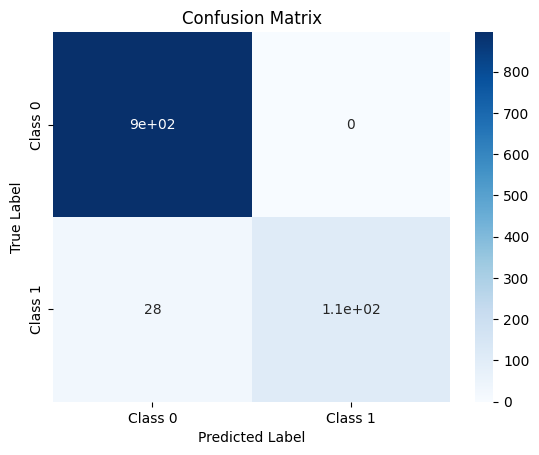

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
# cm = confusion_matrix(ytest, y_pred)

# Define the labels for the x and y axes
labels = ['Class {}'.format(i) for i in range(cm.shape[0])]

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add chart title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#  The diagonal elements represent the correct predictions, while the off-diagonal elements represent the incorrect predictions
# Show the plot
plt.show()


**Comparing values of ensembeled model with actual values**

In [33]:
#print the predictions
print(ensemble.predict(xtest))
#print the actual values
print(ytest.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
